## Target Reflectance

In [1]:
import numpy as np
from scipy.interpolate import interp1d

In [2]:
def fill_nans_scipy1(padata, pkind='linear'):
    """
    Interpolates data to fill nan values

    Parameters:
        padata : nd array 
            source data with np.NaN values

    Returns:
        nd array 
            resulting data with interpolated values instead of nans
    """
    aindexes = np.arange(padata.shape[0])
    agood_indexes, = np.where(np.isfinite(padata))
    f = interp1d(agood_indexes
               , padata[agood_indexes]
               , bounds_error=False
               , copy=False
               , fill_value="extrapolate"
               , kind=pkind)
    return f(aindexes)

In [3]:
wl_file = "/disk1/workspace/20230704/Spectral_Cruve/Green_vegetation/splib07a_Wavelengths_ASD_0.35-2.5_microns_2151_ch.txt"
v_wl = np.loadtxt(wl_file)
ref_file = "/disk1/workspace/20230704/Spectral_Cruve/Green_vegetation/splib07a_Aspen_Aspen-1_green-top_ASDFRa_AREF.txt"
v_ref = np.loadtxt(ref_file)
ref_file = "/disk1/workspace/20230704/Spectral_Cruve/sand/splib07a_Sand_GrndIsle1_no_oil_ASDFRa_AREF.txt"
s_ref = np.loadtxt(ref_file)
ref_file = "/disk1/workspace/20230704/Spectral_Cruve/snow/splib07a_Melting_snow_mSnw01a_ASDFRa_AREF.txt"
snow_ref = np.loadtxt(ref_file)
ref_file = "/disk1/workspace/20230704/Spectral_Cruve/water/splib07a_Water+Montmor_SWy-2+0.50g-l_ASDFRa_AREF.txt"
water_ref = np.loadtxt(ref_file)

In [4]:
v_ref = np.where(v_ref==-1.23e+34,np.nan,v_ref)
s_ref = np.where(s_ref==-1.23e+34,np.nan,s_ref)
v_ref = fill_nans_scipy1(v_ref, pkind='linear') # vegetation spectrum
s_ref = fill_nans_scipy1(s_ref, pkind='linear')
snow_ref = np.where(snow_ref==-1.23e+34,np.nan,snow_ref)
snow_ref = fill_nans_scipy1(snow_ref, pkind='linear')
water_ref = np.where(water_ref==-1.23e+34,np.nan,water_ref)
water_ref = fill_nans_scipy1(water_ref, pkind='linear')

In [5]:
import matplotlib.pyplot as plt

In [20]:
v_ref.shape

(2151,)

(0.0, 0.8)

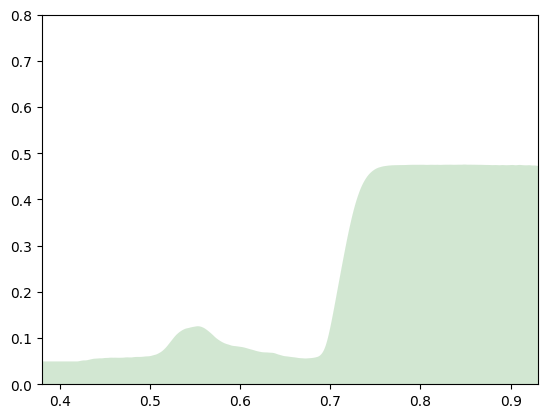

In [42]:
plt.fill_between(v_wl, v_ref, color='forestgreen', edgecolor=None, alpha=0.2)
plt.xlim((0.38, 0.93))
plt.ylim((0.0, 0.8))

## MISR_AHI_SRF + veg rf

In [6]:
import csv

/home/beichen/anaconda3/envs/master_research/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


<Figure size 1000x400 with 0 Axes>

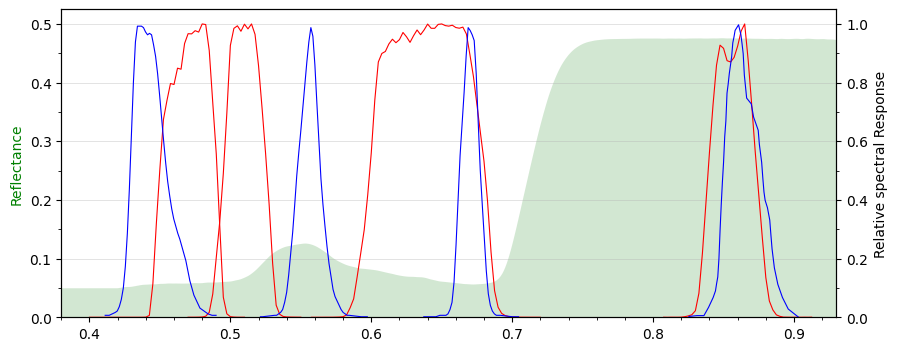

In [13]:
csv_filename = '/disk1/workspace/20230704/AHI_MISR_SRF.csv'
plt.figure(figsize=(10,4))
srf_record = []
with open(csv_filename, 'r') as f:
    reader = csv.reader(f)
    for item in reader:
        srf_item = np.array(item)
        srf_item = srf_item[srf_item != '']
        srf_record.append(srf_item.astype(float))
# remove same keys
srf4mapping = []
for idx in range(0, 8*2, 2):
    srf_record_obj = {}
    wl_array = srf_record[idx]
    srf_array = srf_record[idx+1]
    for srf_idx in range(len(wl_array)):
        srf_record_obj[str(wl_array[srf_idx])] = srf_array[srf_idx]
    srf4mapping.append(srf_record_obj)
srf_array_mapping = []
for srf_record_obj in srf4mapping:
    srf_array_mapping.append(np.array(list(srf_record_obj.keys())).astype(float))
    srf_array_mapping.append(np.array(list(srf_record_obj.values())))
# mapping
f, ax = plt.subplots()
ax2 = ax.twinx()
f.set_size_inches(10, 4)

ax.fill_between(v_wl, v_ref, color='forestgreen', edgecolor=None, alpha=0.2)
for idx in range(8, 8*2, 2):
    ax2.plot(srf_array_mapping[idx]/1000, srf_array_mapping[idx+1], 'r-', linewidth=0.8)
for idx in range(0, 8, 2):
    ax2.plot(srf_array_mapping[idx]/1000, srf_array_mapping[idx+1], 'b-', linewidth=0.8)

plt.grid(b=True, which='major', axis='y', linewidth=0.5, alpha=0.5)
plt.xlabel('Wavelength (μm)')
ax.set_ylabel('Reflectance', color='g')
ax2.set_ylabel('Relative spectral Response')

x_minor_locator = plt.MultipleLocator(0.02)
x_major_locator = plt.MultipleLocator(0.1)
ax.xaxis.set_minor_locator(x_minor_locator)
ax.xaxis.set_major_locator(x_major_locator)
ax2.xaxis.set_minor_locator(x_minor_locator)
ax2.xaxis.set_major_locator(x_major_locator)
y_minor_locator = plt.MultipleLocator(0.05)
y_major_locator = plt.MultipleLocator(0.1)
ax.yaxis.set_minor_locator(y_minor_locator)
ax.yaxis.set_major_locator(y_major_locator)
y2_minor_locator = plt.MultipleLocator(0.1)
y2_major_locator = plt.MultipleLocator(0.2)
ax2.yaxis.set_minor_locator(y2_minor_locator)
ax2.yaxis.set_major_locator(y2_major_locator)
ax.set_xlim((0.38, 0.93))
ax.set_ylim((0.0, 0.525))
ax2.set_ylim((0.0, 1.05))
# plt.show()
plt.savefig('/disk1/workspace/20230907/ahi_misr_srf.png', dpi=600)